# **Retail Sales Data Analysis**

**INTRODUCTION**
# 📊 Retail Sales Data Analysis & Customer Segmentation

### **Objective**
Analyze retail sales data (Superstore dataset) to understand:
- Top products & categories
- Customer lifetime value
- Sales trends & seasonality
- Impact of discounts
- Customer segmentation using K-Means

### **Dataset Used**
Kaggle — Superstore Sales dataset


In [1]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
#LOAD DATASET

df = pd.read_csv("/content/Superstore.csv", encoding = "latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#IMFORMATION

df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
#DATA CLEANING

#checking missing values if any
print(df.isnull().sum())

#removing duplicates
df.drop_duplicates(inplace=True)

#convert Dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

#filling missing values if any
df.fillna(0, inplace=True)



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [5]:
#create new cols
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Revenue'] = df['Sales'] #here revenue=sales.
df['Order_Processing_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Revenue,Order_Processing_Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,261.9600,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,731.9400,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,14.6200,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,957.5775,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,22.3680,7


In [7]:
#EXPLORATORY DATA ANALYSIS (EDA)

#Top 10 Products by Sales
top_products = df.groupby("Sub-Category")['Sales'].sum().sort_values(ascending=False).head(10)
top_products


,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


In [8]:
#Top 10 Customers by Sales
top_customers = df.groupby("Customer Name")['Sales'].sum().sort_values(ascending = False).head(10)
top_customers

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


In [9]:
#Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum()
monthly_sales


Year  Month
2014  1         14236.8950
      2          4519.8920
      3         55691.0090
      4         28295.3450
      5         23648.2870
      6         34595.1276
      7         33946.3930
      8         27909.4685
      9         81777.3508
      10        31453.3930
      11        78628.7167
      12        69545.6205
2015  1         18174.0756
      2         11951.4110
      3         38726.2520
      4         34195.2085
      5         30131.6865
      6         24797.2920
      7         28765.3250
      8         36898.3322
      9         64595.9180
      10        31404.9235
      11        75972.5635
      12        74919.5212
2016  1         18542.4910
      2         22978.8150
      3         51715.8750
      4         38750.0390
      5         56987.7280
      6         40344.5340
      7         39261.9630
      8         31115.3743
      9         73410.0249
      10        59687.7450
      11        79411.9658
      12        96999.0430
2017  1         43971.3740
      2         20301.1334
      3         58872.3528
      4         36521.5361
      5         44261.1102
      6         52981.7257
      7         45264.4160
      8         63120.8880
      9         87866.6520
      10        77776.9232
      11       118447.8250
      12        83829.3188
Name: Sales, dtype: float64

In [10]:
#Category-Wise Revenue
df.groupby("Category")['Sales'].sum()

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


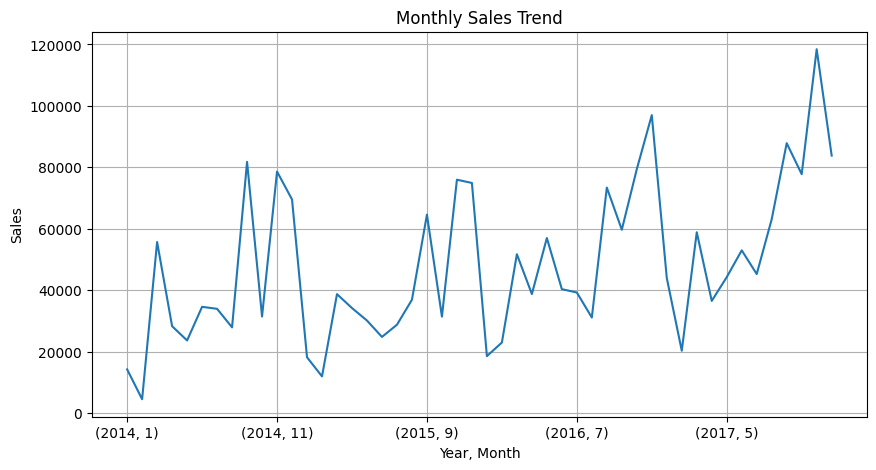

In [11]:
#VISUALIZATION

#Monthly Sales Trend
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Year, Month")
plt.ylabel("Sales")
plt.grid()
plt.show()

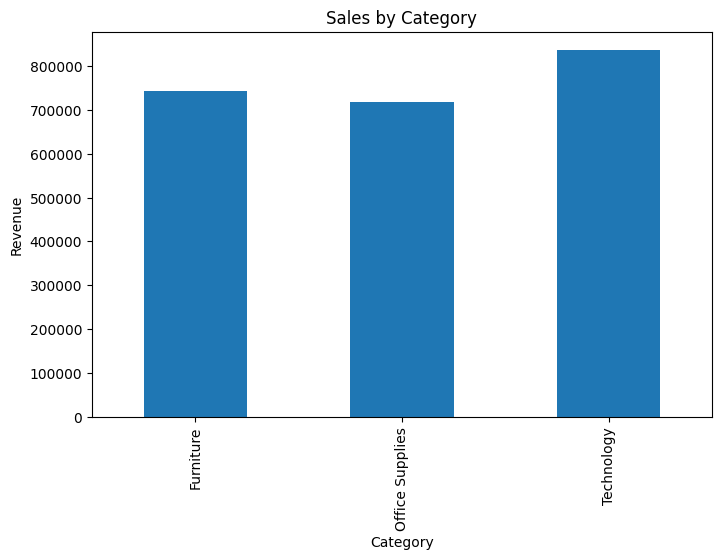

In [12]:
#Category Revenue Bar Chart
plt.figure(figsize=(8,5))
df.groupby("Category")['Sales'].sum().plot(kind='bar')
plt.title("Sales by Category")
plt.ylabel("Revenue")
plt.show()


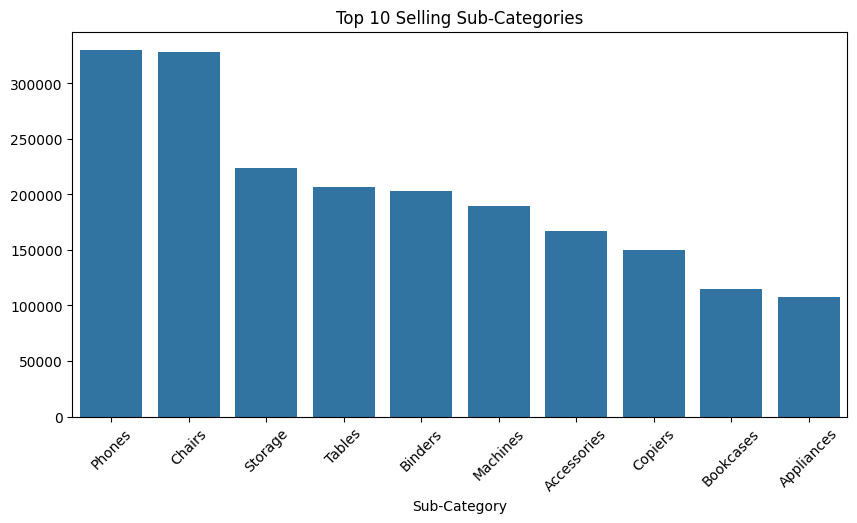

In [13]:
#Top Products Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Selling Sub-Categories")
plt.xticks(rotation=45)
plt.show()

In [14]:
#CUSTOMER SEGMENTATION WITH K-MEANS

#Creating Customer dataset
customer = df.groupby("Customer Name").agg({
    "Sales": "sum",
    "Quantity": "sum",
    "Discount": "mean",
    "Profit": "sum"
})
customer.head()

,Sales,Quantity,Discount,Profit
Customer Name,,,,
Aaron Bergman,886.156,13,0.066667,129.3465
Aaron Hawkins,1744.700,54,0.090909,365.2152
Aaron Smayling,3050.692,48,0.355000,-253.5746
Adam Bellavance,7755.620,56,0.044444,2054.5885
Adam Hart,3250.337,75,0.135000,281.1890


In [15]:
#scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer)

In [16]:
#Apply K-Means Clustering
KMeans = KMeans(n_clusters=4, random_state=42)
customer['Segment'] = KMeans.fit_predict(scaled_data)
customer.head()

,Sales,Quantity,Discount,Profit,Segment
Customer Name,,,,,
Aaron Bergman,886.156,13,0.066667,129.3465,2
Aaron Hawkins,1744.700,54,0.090909,365.2152,2
Aaron Smayling,3050.692,48,0.355000,-253.5746,0
Adam Bellavance,7755.620,56,0.044444,2054.5885,1
Adam Hart,3250.337,75,0.135000,281.1890,3


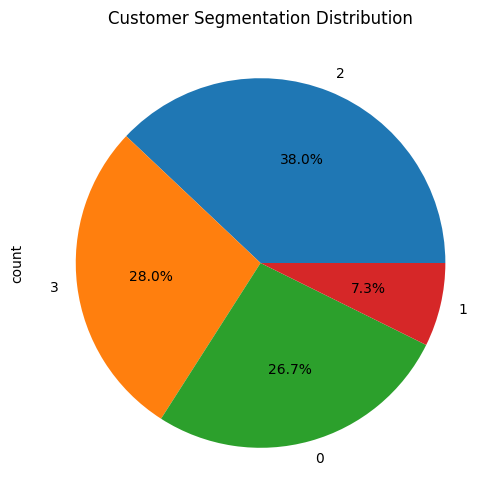

In [17]:
#VISUALIZE SEGMENTS

plt.figure(figsize=(6,6))
customer['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Customer Segmentation Distribution")
plt.show()

# 📌 Business Insights

### 1. **Top Customers**
A small group of customers contributes a large portion of total revenue (Pareto principle).

### 2. **Category Performance**
Technology and Office Supplies are major revenue drivers.

### 3. **Seasonality**
Sales peak in November–December due to festival season.

### 4. **Discount Impact**
Higher discounts increase sales but reduce total profit margins.

### 5. **Customer Segments**
- **Segment 0:** High-value repeat buyers  
- **Segment 1:** Low engagement customers  
- **Segment 2:** Discount seekers  
- **Segment 3:** New / one-time customers  


# **CONCLUSION**
This project successfully demonstrated the complete data analytics workflow, covering data cleaning, exploration, visualization, and customer segmentation. Through detailed analysis of the Superstore dataset, we identified critical business insights such as seasonal sales peaks, category-wise performance, and customer lifetime value. The K-Means clustering model effectively segmented customers into meaningful groups, enabling targeted marketing and improved decision-making. Overall, the project reflects a strong understanding of real-world retail analytics and showcases the ability to convert raw data into actionable business insights